In [1]:
%matplotlib notebook


In [2]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation



**Single fridge problem (Bedford-Fowler 18.2)**


In [4]:
# Set parameters according to exercise description

G = 9.81  # acceleration due to gravity, in m/s^2
F = 133.4
h = 1.524
H = 1.800
d = 0.711
b = 2*0.3556

mu = 0.1

m = 1023/G

I = 1.0/12.0*m*(H**2+b**2)



In [5]:
# Define the function describing the motion 
def derivs(state, t):

    dydx = np.zeros_like(state)
    
    a_x = (F - mu * m*G)/m;

    # x' = v
    dydx[0] = state[1]
    # x'' = v' = a
    dydx[1] = a_x

    return dydx

In [30]:
# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 5.5, dt)


# initial state
state = [0,0]

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

# store the solution in x1 and v1
x1 = y[:, 0]
v1 = y[:, 1]

<IPython.core.display.Javascript object>


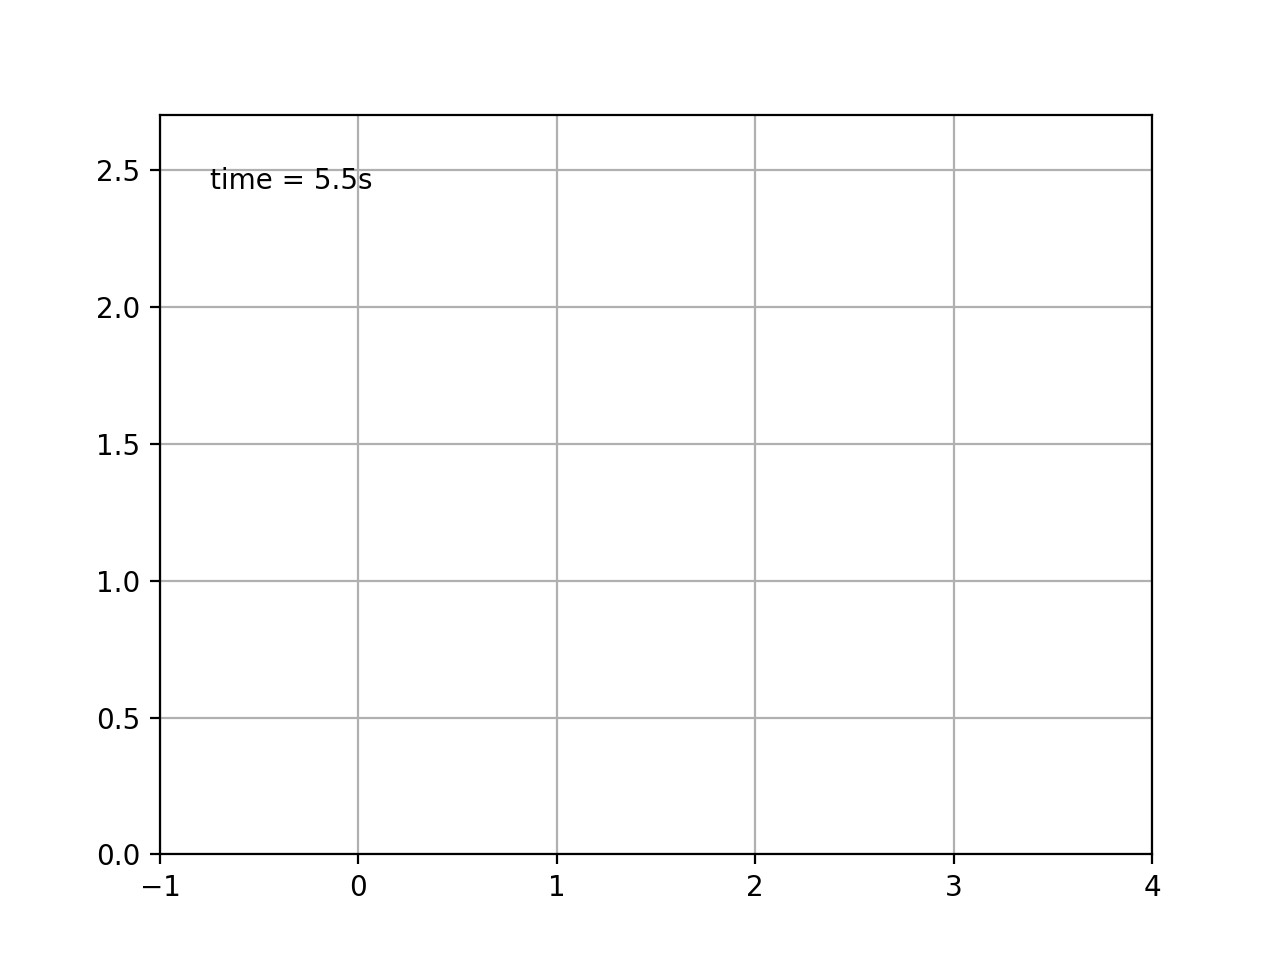

In [7]:
# Animate the solution 

# Set up the figure
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 4), ylim=(0, 1.5*H))
ax.grid()

# Define line properties
line, = ax.plot([], [], 'o-', lw=2)

# Print the time in the figure
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Initializing function for the animation
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

# The animation function
def animate(i):
    thisx = x1[i]+[0,0,b,b]
    thisy = [0,H,H,0]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

# Call the animation
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init, repeat=False)

#ani.save('fridgeoutline.mp4', fps=15)
plt.show()

In [42]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle, Arrow
from matplotlib import artist

<IPython.core.display.Javascript object>


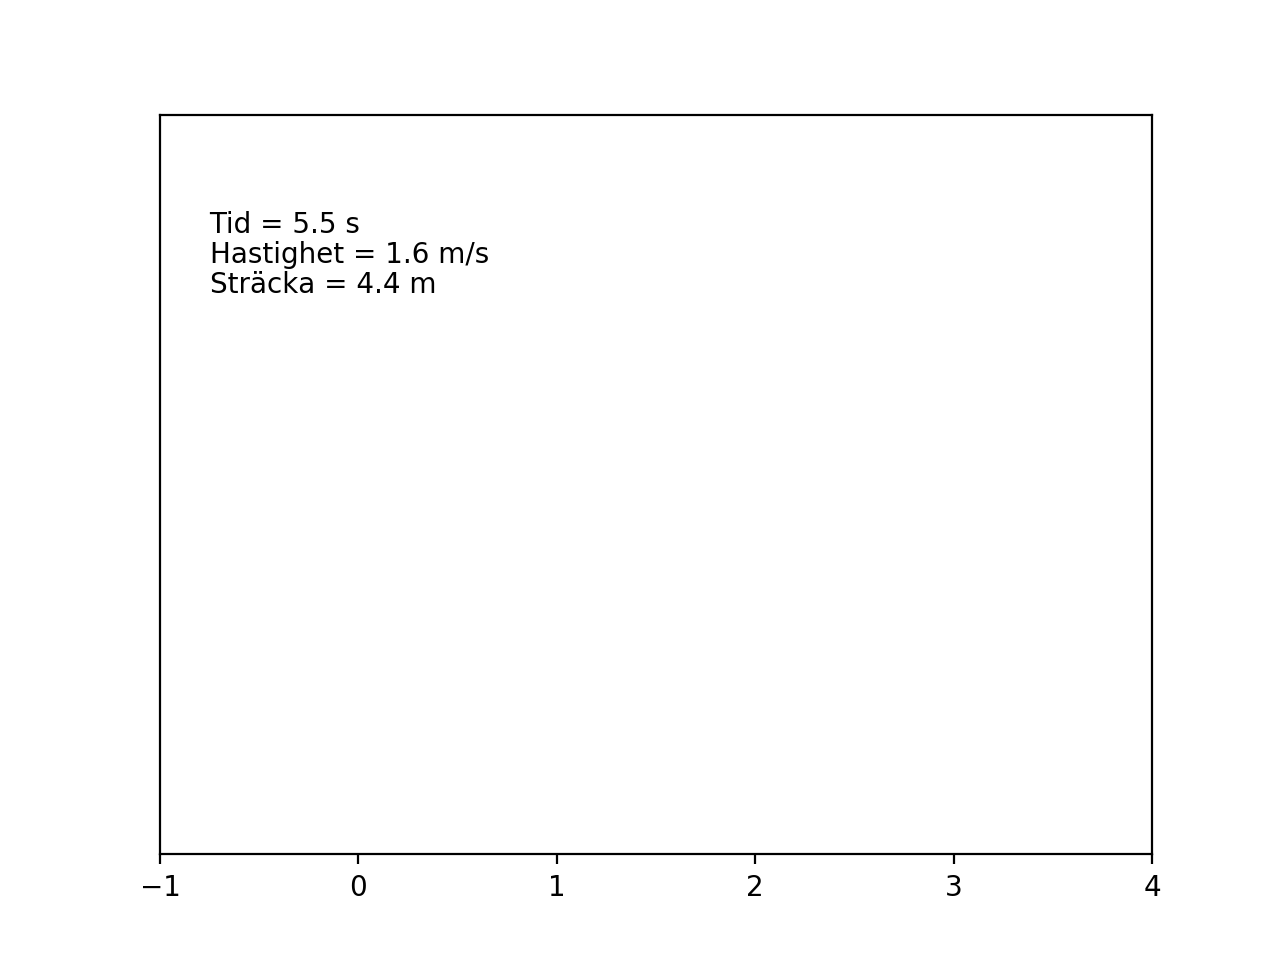

In [36]:
# Animate the solution 

# Set up the figure
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 4), ylim=(0, 1.5*H))
#ax.grid()
plt.yticks([], [])

# Define line properties
line, = ax.plot([], [], 'o-', lw=2)

# Print the time in the figure
time_template = 'Tid = %.1f s'
time_text = ax.text(0.05, 0.84, '', transform=ax.transAxes)
vel_template = 'Hastighet = %.1f m/s'
vel_text = ax.text(0.05, 0.8, '', transform=ax.transAxes)
dist_template = 'Sträcka = %.1f m'
dist_text = ax.text(0.05, 0.76, '', transform=ax.transAxes)


# Approximate the fridge with a rectangular patch
patch = Rectangle((x1[0],0),b,H,angle=0)
#arrow = Rectangle((x1[0],0),b,H,angle=0)

arrow = Arrow(x1[0]-0.5,h,0.5,0,width=0.3,color='red')


# Initializing function for the animation
def init():
    ax.add_patch(patch)
    #ax.add_patch(arrow)

    time_text.set_text(time_template % (0*dt))
    vel_text.set_text(vel_template % (v1[0]))
    dist_text.set_text(dist_template % (x1[0]))

    #return patch, arrow, time_text
    return patch, time_text, vel_text, dist_text


# The animation function
def animate(i):
    
    patch.set_xy([x1[i], 0])
    #arrow.set_xy([x1[i]-0.5, h])


    #ax.add_patch(Rectangle((x1[i],0),b,H,angle=0))
    #arrow=Arrow(x1[i]-0.5,h,0.5,0,width=0.3,color='red')
    #ax.add_patch(arrow)
    
    time_text.set_text(time_template % (i*dt))
    vel_text.set_text(vel_template % (v1[i]))
    dist_text.set_text(dist_template % (x1[i]))


    return patch, time_text, vel_text, dist_text

# Call the animation
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=50, blit=True, init_func=init, repeat=False)

#ani.save('fridgebox.mp4', fps=15)
plt.show()

<IPython.core.display.Javascript object>


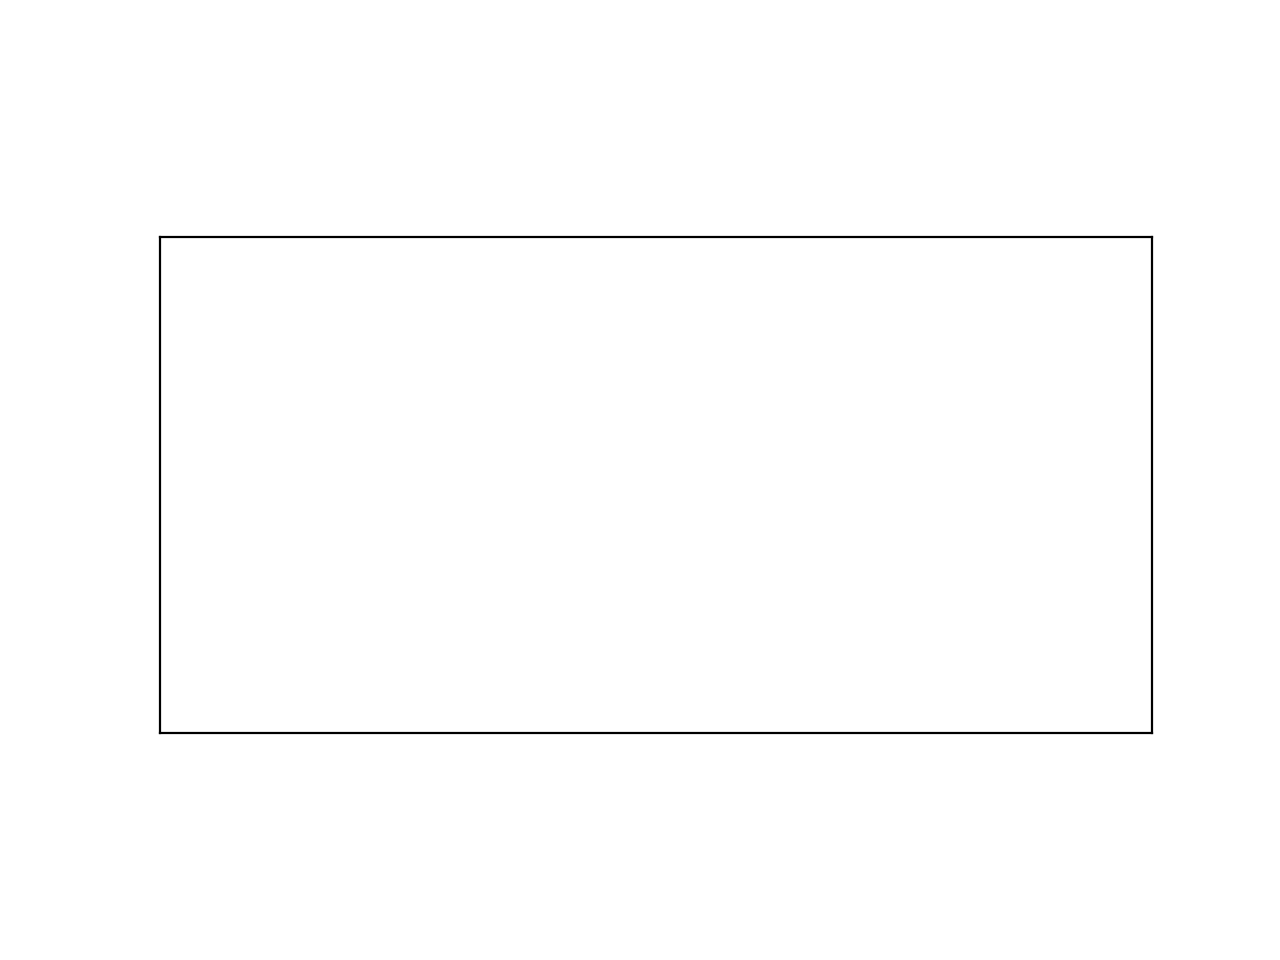

In [48]:
# Animate the solution 

# Set up the figure
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 4), ylim=(0, 1.5*H))
#ax.grid()
plt.yticks([], [])
plt.xticks([], [])


# Define line properties
line, = ax.plot([], [], 'o-', lw=2)

# Print the time in the figure
time_template = 'Tid = %.1f s'
time_text = ax.text(0.05, 0.84, '', transform=ax.transAxes)
vel_template = 'Hastighet = %.1f m/s'
vel_text = ax.text(0.05, 0.8, '', transform=ax.transAxes)
dist_template = 'Sträcka = %.1f m'
dist_text = ax.text(0.05, 0.76, '', transform=ax.transAxes)

imi = plt.imread('kylskap.png')

ax.set_xlim(0,600)
ax.set_ylim(0,300)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i,time in enumerate(t):
    im = plt.imshow(imi, origin='upper',extent=[x1[i]*136/b,136+x1[i]*136/b,0,245])
    ims.append([im])
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000,repeat=False)




#ani.save('fridge.mp4', fps=15)
plt.show()